In [1]:
import pandas
from sklearn import svm, preprocessing, neighbors, ensemble, neural_network, naive_bayes
import joblib

In [2]:
train_data = pandas.read_csv('train_test_datasets/features_train_70000.csv')
test_data = pandas.read_csv('train_test_datasets/features_test_70000.csv')

X_train, y_train = train_data.drop([' Tag'], axis=1), train_data[' Tag']
X_test, y_test = test_data.drop([' Tag'], axis=1), test_data[' Tag']

scale_to_min_max = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train, X_test = scale_to_min_max.fit_transform(X_train), scale_to_min_max.fit_transform(X_test)

[Text(0.50625, 0.9166666666666666, 'X[7] <= 0.854\ngini = 0.5\nsamples = 35367\nvalue = [27943, 28056]'),
 Text(0.26666666666666666, 0.75, 'X[6] <= 0.295\ngini = 0.314\nsamples = 21407\nvalue = [27238, 6591]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[6] <= 0.145\ngini = 0.132\nsamples = 15806\nvalue = [23261, 1784]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[6] <= 0.124\ngini = 0.016\nsamples = 11289\nvalue = [17753, 140]'),
 Text(0.03333333333333333, 0.25, 'X[1] <= 0.23\ngini = 0.002\nsamples = 10168\nvalue = [16116, 13]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 8668\nvalue = [13714, 3]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.008\nsamples = 1500\nvalue = [2402, 10]'),
 Text(0.1, 0.25, 'X[7] <= 0.782\ngini = 0.134\nsamples = 1121\nvalue = [1637, 127]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.03\nsamples = 889\nvalue = [1371, 21]'),
 Text(0.11666666666666667, 0.08333333333333333, 'gini = 0.408\nsamples = 232\nv

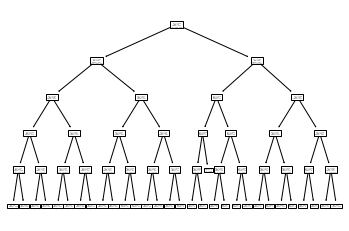

In [6]:
from matplotlib import pyplot as plt
from sklearn import tree


desired_classifier = ensemble.RandomForestClassifier(max_depth=5, n_estimators=200, max_features=4, min_samples_split=4)
desired_classifier.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(desired_classifier.estimators_[0])

In [11]:
print("Accuracy of train: ", desired_classifier.score(X_train, y_train))
print("Accuracy of test: ", desired_classifier.score(X_test, y_test))

Accuracy of train:  0.9200700012500224
Accuracy of test:  0.9157796985498964


In [16]:
train_data.columns[-1]

' Tag'

[Text(0.50625, 0.9166666666666666, ' Complexity <= 0.854\ngini = 0.5\nsamples = 35367\nvalue = [27943, 28056]\nclass = Stego'),
 Text(0.26666666666666666, 0.75, ' Mobility <= 0.295\ngini = 0.314\nsamples = 21407\nvalue = [27238, 6591]\nclass = Clean'),
 Text(0.13333333333333333, 0.5833333333333334, ' Mobility <= 0.145\ngini = 0.132\nsamples = 15806\nvalue = [23261, 1784]\nclass = Clean'),
 Text(0.06666666666666667, 0.4166666666666667, ' Mobility <= 0.124\ngini = 0.016\nsamples = 11289\nvalue = [17753, 140]\nclass = Clean'),
 Text(0.03333333333333333, 0.25, ' Skewness <= 0.23\ngini = 0.002\nsamples = 10168\nvalue = [16116, 13]\nclass = Clean'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 8668\nvalue = [13714, 3]\nclass = Clean'),
 Text(0.05, 0.08333333333333333, 'gini = 0.008\nsamples = 1500\nvalue = [2402, 10]\nclass = Clean'),
 Text(0.1, 0.25, ' Complexity <= 0.782\ngini = 0.134\nsamples = 1121\nvalue = [1637, 127]\nclass = Clean'),
 Text(0.0833333333333333

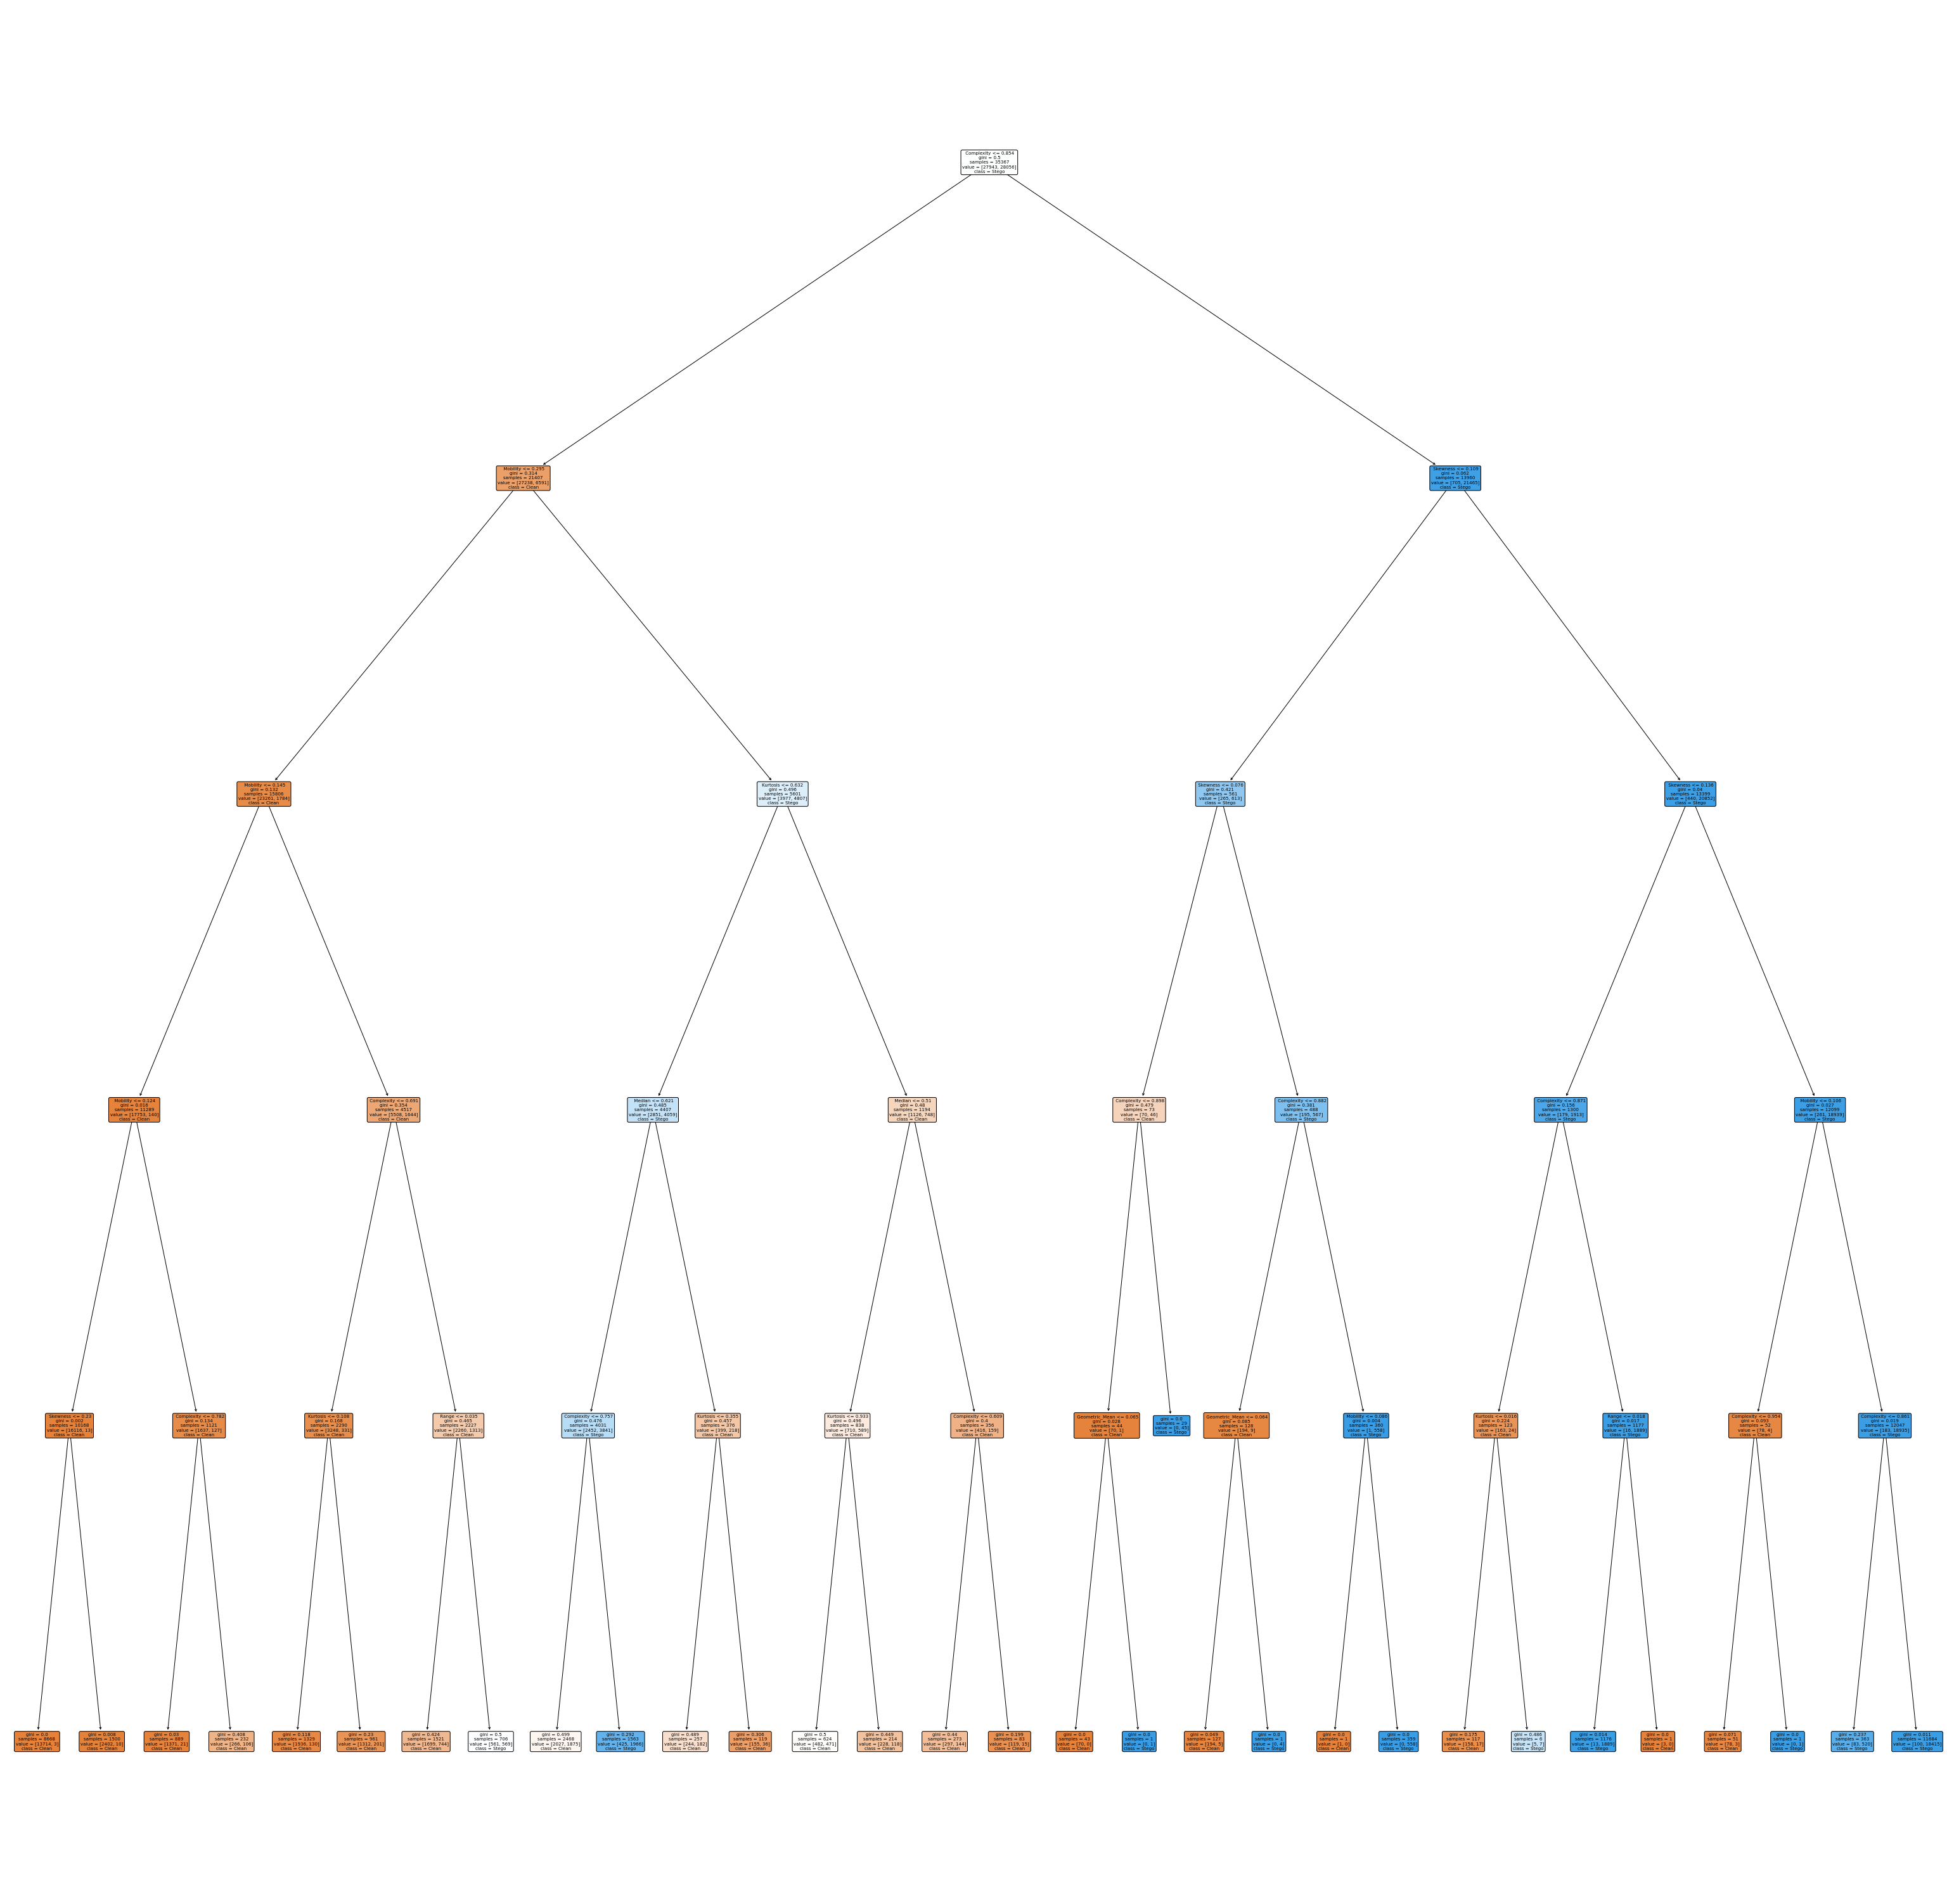

In [18]:
fig = plt.figure(figsize=(55, 55))
tree.plot_tree(desired_classifier.estimators_[0],
          filled=True, impurity=True,
          feature_names=train_data.columns[:-1],
          class_names=['Clean', 'Stego'],
          rounded=True)

In [3]:
def set_a_svm_classifier(joblib_path):
    """
        Create SVM classifier with training predefined features,
        and download and save the trained model in .joblib file
    """
    desired_classifier = svm.SVC(kernel = 'linear', C=1, gamma='auto')
    desired_classifier.fit(X_train, y_train)
        
    print("SVM classifier:")
    print("Accuracy of train: ", desired_classifier.score(X_train, y_train))
    print("Accuracy of test: ", desired_classifier.score(X_test, y_test))
    
    joblib.dump(desired_classifier, joblib_path)

In [4]:
def set_a_knn_classifier(joblib_path, n_neighbors):
    """
        Create KNN classifier with training predefined parameters,
        and download and save the trained model in .joblib file
    """
    desired_classifier = neighbors.KNeighborsClassifier(n_neighbors)
    desired_classifier.fit(X_train, y_train)
    
    print("K-Nearest Neighbors classifier: ")
    print("Accuracy of train: ", desired_classifier.score(X_train, y_train))
    print("Accuracy of test: ", desired_classifier.score(X_test, y_test))
    
    joblib.dump(desired_classifier, joblib_path)

In [5]:
from matplotlib import pyplot as plt
from sklearn import tree

def set_a_random_forest_classifier(joblib_path, max_depth, n_estimators, max_features):
    """
        Create RF classifier with training predefined parameters,
        and download and save the trained model in .joblib file
    """
    desired_classifier = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features, min_samples_split=4)
    fn=train_data.feature_names
    cn=train_data.target_names
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    tree.plot_tree(desired_classifier.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True)
    fig.savefig('rf_individualtree.png')
    desired_classifier.fit(X_train, y_train)
    
    print("Random Forests classifier: ")
    print("Accuracy of train: ", desired_classifier.score(X_train, y_train))
    print("Accuracy of test: ", desired_classifier.score(X_test, y_test))
    
    joblib.dump(desired_classifier, joblib_path)

In [6]:

def set_a_mlp_classifier(joblib_path, alpha):
    """
        Create MLP classifier with training predefined parameters,
        and download and save the trained model in .joblib file
    """
    desired_classifier = neural_network.MLPClassifier(alpha=alpha, max_iter=100)
    desired_classifier.fit(X_train, y_train)


    print("MLP NN classifier: ")
    print("Accuracy of train: ", desired_classifier.score(X_train, y_train))
    print("Accuracy of test: ", desired_classifier.score(X_test, y_test))
    
    joblib.dump(desired_classifier, joblib_path) # save classifier in the joblib file

In [7]:
def set_a_nb_classifier(joblib_path):
    """
        Create Naive Bayes classifier with training predefined parameters,
        and download and save the trained model in .joblib file
    """
    desired_classifier = naive_bayes.GaussianNB()
    desired_classifier.fit(X_train, y_train)
    
    print("Naive Bayes classifier: ")
    print("Accuracy of train: ", desired_classifier.score(X_train, y_train))
    print("Accuracy of test: ", desired_classifier.score(X_test, y_test))
    
    joblib.dump(desired_classifier, joblib_path)

In [8]:
set_a_svm_classifier('trained/svm-classifier.joblib')
set_a_knn_classifier('trained/knn-classifier.joblib', 7)
set_a_random_forest_classifier('trained/rf-classifier.joblib', 15, 200, 4)
set_a_mlp_classifier('trained/mlp-classifier.joblib', .01)
set_a_nb_classifier('trained/nb-classifier.joblib')

SVM classifier:
Accuracy on train set:  0.9048733013089519
Accuracy on test set:  0.9029930709336381
K-Nearest Neighbors classifier: 
Accuracy on train set:  0.9436775656708155
Accuracy on test set:  0.9294235302521608
Random Forests classifier: 
Accuracy on train set:  0.9831068411935927
Accuracy on test set:  0.9310665047503394


/home/nastiositi/disk_e/PycharmProjects/steganalysis-ml-main/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP NN classifier: 
Accuracy on train set:  0.9273201307166199
Accuracy on test set:  0.923851703693121
Naive Bayes classifier: 
Accuracy on train set:  0.898480330005893
Accuracy on test set:  0.8510607900564326
